<a href="https://colab.research.google.com/github/sampathkumaran90/dffloor/blob/master/SSD_FINE_TUNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 45.0MB/s 
     |████████████████████████████████| 3.9MB 47.2MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
!pip install tensorflow==1.15.0
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [0]:
!cat /proc/meminfo

MemTotal:       13335180 kB
MemFree:         2714076 kB
MemAvailable:   12217844 kB
Buffers:          127796 kB
Cached:          9274528 kB
SwapCached:            0 kB
Active:          1090156 kB
Inactive:        8901584 kB
Active(anon):     498016 kB
Inactive(anon):     8516 kB
Active(file):     592140 kB
Inactive(file):  8893068 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               600 kB
Writeback:             0 kB
AnonPages:        589456 kB
Mapped:           455772 kB
Shmem:              9100 kB
Slab:             386104 kB
SReclaimable:     344352 kB
SUnreclaim:        41752 kB
KernelStack:        3840 kB
PageTables:         6868 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667588 kB
Committed_AS:    3054972 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cd "/content/drive/My Drive/ssd/models/research/object_detection"

In [0]:
!cp -r "/content/pixelperfect_images/" "/content/drive/My Drive/ssd/models/research/object_detection/"

In [0]:
# THIS IS FOR PIXEL PERFECT
!unzip "/content/drive/My Drive/ssd/models/research/object_detection/pixelperfect_images.zip"

Archive:  /content/drive/My Drive/ssd/models/research/object_detection/pixelperfect_images.zip
   creating: pixelperfect_images/test/
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=134.jpg  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=134.xml  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=135.jpg  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=135.xml  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=136.jpg  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=136.xml  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=137.jpg  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=137.xml  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=138.jpg  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=138.xml  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=139.jpg  
  inflating: pixelperfect_images/test/20200414_090234.mp4#t=139.xml  
  inflating: pixelperfect_

In [0]:
!unzip "/content/drive/My Drive/ssd/models/research/raw_output_tf/ImageSets/images/train/train.zip"

Archive:  /content/drive/My Drive/ssd/models/research/raw_output_tf/ImageSets/images/train/train.zip
  inflating: train/Home.mp4#t=1.jpg  
  inflating: train/Home.mp4#t=1.xml  
  inflating: train/Home.mp4#t=10.jpg  
  inflating: train/Home.mp4#t=10.xml  
  inflating: train/Home.mp4#t=12.jpg  
  inflating: train/Home.mp4#t=12.xml  
  inflating: train/Home.mp4#t=13.jpg  
  inflating: train/Home.mp4#t=13.xml  
  inflating: train/Home.mp4#t=14.jpg  
  inflating: train/Home.mp4#t=14.xml  
  inflating: train/Home.mp4#t=15.jpg  
  inflating: train/Home.mp4#t=15.xml  
  inflating: train/Home.mp4#t=16.jpg  
  inflating: train/Home.mp4#t=16.xml  
  inflating: train/Home.mp4#t=17.jpg  
  inflating: train/Home.mp4#t=17.xml  
  inflating: train/Home.mp4#t=18.jpg  
  inflating: train/Home.mp4#t=18.xml  
  inflating: train/Home.mp4#t=2.jpg  
  inflating: train/Home.mp4#t=2.xml  
  inflating: train/Home.mp4#t=20.jpg  
  inflating: train/Home.mp4#t=20.xml  
  inflating: train/Home.mp4#t=21.jpg  
  infl

In [0]:
%cd '/content/drive/My Drive/ssd'

/content/drive/My Drive/ssd


In [0]:
!ls

cocoapi  models  raw_output_tf.zip


In [0]:
!git clone https://github.com/tensorflow/models.git
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/

fatal: destination path 'models' already exists and is not an empty directory.
fatal: destination path 'cocoapi' already exists and is not an empty directory.
python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v

In [0]:
!git clone https://github.com/tensorflow/models.git
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/

fatal: destination path 'models' already exists and is not an empty directory.
fatal: destination path 'cocoapi' already exists and is not an empty directory.
python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v

In [0]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,818 kB of archives.
After this operation, 7,685 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd

In [0]:
%cd '/content/drive/My Drive/ssd/models/research/'
!protoc object_detection/protos/*.proto --python_out=.

/content/drive/My Drive/ssd/models/research


In [0]:
import os
os.environ['PYTHONPATH'] += ':/content/drive/My Drive/ssd/models/research/:/content/drive/My Drive/ssd/models/research/slim'

In [0]:
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/keypoint_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/target_assigner_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/losses_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/train_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/mean_stddev_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/model_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detect

In [0]:
import time, psutil
Start = time.time()- psutil.boot_time()
Left= 12*3600 - Start
print('Time remaining for this session is: ', Left/3600)

Time remaining for this session is:  11.146356128189298


In [0]:
print(tf.__version__)

2.2.0-rc2


In [0]:
!unzip '/content/drive/My Drive/ssd/raw_output_tf.zip'

Archive:  /content/drive/My Drive/ssd/raw_output_tf.zip
   creating: raw_output_tf/Annotations/
  inflating: raw_output_tf/Annotations/aug_0_6450465.xml  
  inflating: raw_output_tf/Annotations/aug_1_3761099.xml  
  inflating: raw_output_tf/Annotations/aug_10_2121011.xml  
  inflating: raw_output_tf/Annotations/aug_11_9792184.xml  
  inflating: raw_output_tf/Annotations/aug_12_3128953.xml  
  inflating: raw_output_tf/Annotations/aug_13_851551.xml  
  inflating: raw_output_tf/Annotations/aug_14_9532772.xml  
  inflating: raw_output_tf/Annotations/aug_15_7578685.xml  
  inflating: raw_output_tf/Annotations/aug_16_1658058.xml  
  inflating: raw_output_tf/Annotations/aug_17_8691550.xml  
  inflating: raw_output_tf/Annotations/aug_18_6041789.xml  
  inflating: raw_output_tf/Annotations/aug_19_8942772.xml  
  inflating: raw_output_tf/Annotations/aug_2_9606374.xml  
  inflating: raw_output_tf/Annotations/aug_20_7965302.xml  
  inflating: raw_output_tf/Annotations/aug_21_9271498.xml  
  inflat

In [0]:
%cd '/content/drive/My Drive/ssd/models/research'

/content/drive/My Drive/ssd/models/research


In [0]:
pwd

'/content/drive/My Drive/ssd/models/research'

In [0]:
a = [1,2,3,4,5]
print([i for i in a])

[1, 2, 3, 4, 5]


In [0]:
import os
train = "train"
image_path = os.path.join('/content/drive/My Drive/ssd/models/research/ppiter2', '/{}'.format(train))
print(image_path)

/train


In [0]:
!python xml_to_csv.py

/content/drive/My Drive/ssd/models/research/ppiter2/train
/content/drive/My Drive/ssd/models/research/ppiter2/train
['/content/drive/My Drive/ssd/models/research/ppiter2/train/20200414_090234.mp4#t=0.xml', '/content/drive/My Drive/ssd/models/research/ppiter2/train/20200414_090234.mp4#t=1.xml', '/content/drive/My Drive/ssd/models/research/ppiter2/train/20200414_090234.mp4#t=10.xml', '/content/drive/My Drive/ssd/models/research/ppiter2/train/20200414_090234.mp4#t=100.xml', '/content/drive/My Drive/ssd/models/research/ppiter2/train/20200414_090234.mp4#t=101.xml', '/content/drive/My Drive/ssd/models/research/ppiter2/train/20200414_090234.mp4#t=102.xml', '/content/drive/My Drive/ssd/models/research/ppiter2/train/20200414_090234.mp4#t=103.xml', '/content/drive/My Drive/ssd/models/research/ppiter2/train/20200414_090234.mp4#t=104.xml', '/content/drive/My Drive/ssd/models/research/ppiter2/train/20200414_090234.mp4#t=105.xml', '/content/drive/My Drive/ssd/models/research/ppiter2/train/20200414_0

In [0]:
s = '218.911'
v = float(s)

In [0]:
!pwd

/content/drive/My Drive/ssd/models/research


In [0]:
!cp -r "/content/drive/My Drive/ssd/models/research/data/test_pp_labels.csv" "/content/drive/My Drive/ssd/models/research/object_detection/data/" 

In [0]:
!cp -r "/content/drive/My Drive/ssd/models/research/data/train_pp_labels.csv" "/content/drive/My Drive/ssd/models/research/object_detection/data/" 

In [0]:
!cp -r "/content/drive/My Drive/ssd/models/research/raw_output_tf/ImageSets/images" "/content/drive/My Drive/ssd/models/research/object_detection/Images/" 

In [0]:
!cp -R -v "/content/drive/My Drive/ssd/models/research/raw_output_tf/ImageSets/images/train/train/" "/content/drive/My Drive/ssd/models/research/object_detection/Images/images/"

'/content/drive/My Drive/ssd/models/research/raw_output_tf/ImageSets/images/train/train/Home.mp4#t=1.jpg' -> '/content/drive/My Drive/ssd/models/research/object_detection/Images/images/train/Home.mp4#t=1.jpg'
'/content/drive/My Drive/ssd/models/research/raw_output_tf/ImageSets/images/train/train/Home.mp4#t=1.xml' -> '/content/drive/My Drive/ssd/models/research/object_detection/Images/images/train/Home.mp4#t=1.xml'
'/content/drive/My Drive/ssd/models/research/raw_output_tf/ImageSets/images/train/train/Home.mp4#t=10.jpg' -> '/content/drive/My Drive/ssd/models/research/object_detection/Images/images/train/Home.mp4#t=10.jpg'
'/content/drive/My Drive/ssd/models/research/raw_output_tf/ImageSets/images/train/train/Home.mp4#t=10.xml' -> '/content/drive/My Drive/ssd/models/research/object_detection/Images/images/train/Home.mp4#t=10.xml'
'/content/drive/My Drive/ssd/models/research/raw_output_tf/ImageSets/images/train/train/Home.mp4#t=12.jpg' -> '/content/drive/My Drive/ssd/models/research/objec

In [0]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.1.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.1.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.1.0


In [0]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 45kB/s 
     |████████████████████████████████| 3.8MB 29.8MB/s 
     |████████████████████████████████| 512kB 39.0MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0


In [0]:
!python /content/drive/'My Drive'/ssd/models/research/object_detection/generate_tfrecord.py --csv_input=/content/drive/'My Drive'/ssd/models/research/object_detection/data/test_pp_labels.csv  --output_path=test_pp.record  --image_dir="/content/drive/My Drive/ssd/models/research/object_detection/ppiter2/test/"

Successfully created the TFRecords: /content/drive/My Drive/ssd/models/research/test_pp.record


In [0]:
!python /content/drive/'My Drive'/ssd/models/research/object_detection/generate_tfrecord.py --csv_input=/content/drive/'My Drive'/ssd/models/research/object_detection/data/train_pp_labels.csv  --output_path=train_pp.record  --image_dir=/content/drive/'My Drive'/ssd/models/research/object_detection/ppiter2/train/

Successfully created the TFRecords: /content/drive/My Drive/ssd/models/research/train_pp.record


In [0]:
!cp -r "/content/drive/My Drive/ssd/models/research/object_detection/Images/images/train/train" "/content/drive/My Drive/ssd/models/research/object_detection/Images/images/train/"

cp: '/content/drive/My Drive/ssd/models/research/object_detection/Images/images/train/train' and '/content/drive/My Drive/ssd/models/research/object_detection/Images/images/train/train' are the same file


In [0]:
print(tf.__version__)

1.15.0


In [0]:
!wget http://download.tensorflow.org/models/object_detection/ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz
!tar -xvf ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz

--2020-03-19 14:48:05--  http://download.tensorflow.org/models/object_detection/ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.203.128, 2404:6800:4008:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51025348 (49M) [application/x-tar]
Saving to: ‘ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz’

ssdlite_mobilenet_v 100%[===================>]  48.66M  84.0MB/s    in 0.6s    

2020-03-19 14:48:06 (84.0 MB/s) - ‘ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz’ saved [51025348/51025348]

ssdlite_mobilenet_v2_coco_2018_05_09/checkpoint
ssdlite_mobilenet_v2_coco_2018_05_09/model.ckpt.data-00000-of-00001
ssdlite_mobilenet_v2_coco_2018_05_09/model.ckpt.meta
ssdlite_mobilenet_v2_coco_2018_05_09/model.ckpt.index
ssdlite_mobilenet_v2_coco_2018_05_09/saved_model/saved_model.pb
ssdlite_mobilenet_v2_coco_2018_05_09/pipeline.config
s

In [0]:
!curl https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/samples/configs/ssdlite_mobilenet_v2_coco.config

# SSDLite with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 90
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        as

In [0]:
!pwd

/content/drive/My Drive/ssd/models/research


In [0]:
!cp -r "/content/drive/My Drive/ssd/models/research/pixelperfect.pbtxt" "/content/drive/My Drive/ssd/models/research/object_detection/data/"

In [0]:
!cp -r "/content/drive/My Drive/ssd/models/research/pixelperfect.pbtxt" "/content/drive/My Drive/ssd/models/research/object_detection/3_pp_neg/"

In [0]:
!cp -r "/content/drive/My Drive/ssd/models/research/train_pp.record" "/content/drive/My Drive/ssd/models/research/object_detection/3_pp_neg/"

In [0]:
!cp -r "/content/drive/My Drive/ssd/models/research/test_pp.record" "/content/drive/My Drive/ssd/models/research/object_detection/3_pp_neg/"

In [0]:
LOG_DIR = 'training'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
! npm install -g localtunnel
! npm i -g npm

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.0
added 35 packages from 21 contributors in 2.425s
/tools/node/bin/npx -> /tools/node/lib/node_modules/npm/bin/npx-cli.js
/tools/node/bin/npm -> /tools/node/lib/node_modules/npm/bin/npm-cli.js
+ npm@6.14.4
added 325 packages from 161 contributors, removed 423 packages and updated 59 packages in 9.222s


   ╭──────────────────────────────────────╮
   │                                      │
   │   Update available 5.7.1 → 6.14.4    │
   │      Run npm i -g npm to update      │
   │                                      │
   ╰──────────────────────────────────────╯



In [0]:
get_ipython().system_raw('lt --port 6006 >> url1.txt 2>&1 &')

In [0]:
!cat url1.txt

In [0]:
!unzip "/content/drive/My Drive/ssd/models/research/object_detection/ppiter2.zip"

Archive:  /content/drive/My Drive/ssd/models/research/object_detection/ppiter2.zip
   creating: ppiter2/test/
  inflating: ppiter2/test/20200414_090234.mp4#t=152.jpg  
  inflating: ppiter2/test/20200414_090234.mp4#t=152.xml  
  inflating: ppiter2/test/20200414_090234.mp4#t=153.jpg  
  inflating: ppiter2/test/20200414_090234.mp4#t=153.xml  
  inflating: ppiter2/test/20200414_090234.mp4#t=154.jpg  
  inflating: ppiter2/test/20200414_090234.mp4#t=154.xml  
  inflating: ppiter2/test/20200414_090234.mp4#t=155.jpg  
  inflating: ppiter2/test/20200414_090234.mp4#t=155.xml  
  inflating: ppiter2/test/20200414_090234.mp4#t=156.jpg  
  inflating: ppiter2/test/20200414_090234.mp4#t=156.xml  
  inflating: ppiter2/test/20200414_090234.mp4#t=157.jpg  
  inflating: ppiter2/test/20200414_090234.mp4#t=157.xml  
  inflating: ppiter2/test/20200414_090234.mp4#t=158.jpg  
  inflating: ppiter2/test/20200414_090234.mp4#t=158.xml  
  inflating: ppiter2/test/20200414_090234.mp4#t=159.jpg  
  inflating: ppiter2

In [0]:
!cp -r "/content/drive/My Drive/ssd/models/research/object_detection/legacy/train.py" "/content/drive/My Drive/ssd/models/research/object_detection"

In [0]:
!python "/content/drive/My Drive/ssd/models/research/object_detection/train.py" --logtostderr --train_dir="/content/drive/My Drive/ssd/models/research/object_detection/10_pp_neg/" --pipeline_config_path="/content/drive/My Drive/ssd/models/research/object_detection/ssdlite_mobilenet_v2_coco.config"

Streaming output truncated to the last 5000 lines.
I0417 12:51:18.833010 140592071264128 learning.py:507] global step 19699: loss = 1.0352 (0.221 sec/step)
INFO:tensorflow:global step 19700: loss = 2.1772 (0.221 sec/step)
I0417 12:51:19.055515 140592071264128 learning.py:507] global step 19700: loss = 2.1772 (0.221 sec/step)
INFO:tensorflow:global step 19701: loss = 2.8220 (0.230 sec/step)
I0417 12:51:19.286800 140592071264128 learning.py:507] global step 19701: loss = 2.8220 (0.230 sec/step)
INFO:tensorflow:global step 19702: loss = 1.6916 (0.226 sec/step)
I0417 12:51:19.514057 140592071264128 learning.py:507] global step 19702: loss = 1.6916 (0.226 sec/step)
INFO:tensorflow:global step 19703: loss = 5.3461 (0.226 sec/step)
I0417 12:51:19.741360 140592071264128 learning.py:507] global step 19703: loss = 5.3461 (0.226 sec/step)
INFO:tensorflow:global step 19704: loss = 1.5280 (0.226 sec/step)
I0417 12:51:19.969136 140592071264128 learning.py:507] global step 19704: loss = 1.5280 (0.226

In [0]:
 tf.__version__
 !pwd

/content/drive/My Drive/ssd/models/research


In [0]:
import tensorflow as tf

In [0]:
!export PYTHONPATH=$PYTHONPATH:pwd:pwd/slim

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
!python "/content/drive/My Drive/ssd/models/research/object_detection/export_inference_graph.py" \
--input_type image_tensor \
--pipeline_config_path "/content/drive/My Drive/ssd/models/research/object_detection/ssdlite_mobilenet_v2_coco.config" \
--trained_checkpoint_prefix "/content/drive/My Drive/ssd/models/research/object_detection/3_pp_neg/model.ckpt-18602" \
--output_directory "/content/drive/My Drive/ssd/models/research/object_detection/3_pp_neg/18000/"

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0417 10:19:00.398537 139712129972096 module_wrapper.py:139] From /content/drive/My Drive/ssd/models/research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0417 10:19:00.405645 139712129972096 module_wrapper.py:139] From /content/drive/My Drive/ssd/models/research/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0417 10:19:00.406289 139712129972096 module_wrapper.py:139] From /content/drive/My Drive/ssd/models/research/object_detection/exporter.py:121: The name tf.placeholder 

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

In [0]:
sys.path.append("..")

In [0]:
from object_detection.utils import ops as utils_ops

In [0]:
%matplotlib inline

In [0]:
!pwd

/content/drive/My Drive/ssd/models/research


In [0]:
%cd "/content/drive/My Drive/ssd/models/research/object_detection"

/content/drive/My Drive/ssd/models/research/object_detection


In [0]:
!pwd

/content/drive/My Drive/ssd/models/research/object_detection


[100.]
[[5.8877957e-01 3.4527946e-01 1.1476040e-02 4.7674179e-03 4.3195784e-03
  2.9205084e-03 2.1767318e-03 2.0489395e-03 2.0370483e-03 2.0224750e-03
  1.9776821e-03 1.8316805e-03 1.7302036e-03 1.6684532e-03 1.2816489e-03
  1.2232363e-03 1.1754334e-03 1.1392236e-03 1.0244846e-03 1.0016561e-03
  9.9706650e-04 9.5590949e-04 9.4938278e-04 8.7824464e-04 8.6751580e-04
  8.5359812e-04 8.4266067e-04 7.8767538e-04 7.6338649e-04 7.2810054e-04
  7.1114302e-04 6.8879128e-04 6.7803264e-04 6.5827370e-04 6.4477324e-04
  6.0495734e-04 5.8987737e-04 5.6916475e-04 5.4919720e-04 5.3858757e-04
  5.3083897e-04 5.2505732e-04 4.8902631e-04 4.8461556e-04 4.7850609e-04
  4.7326088e-04 4.5704842e-04 4.5099854e-04 4.4405460e-04 4.4372678e-04
  4.2772293e-04 4.1684508e-04 4.1371584e-04 3.9353967e-04 3.9130449e-04
  3.8313866e-04 3.8096309e-04 3.7977099e-04 3.7866831e-04 3.7574768e-04
  3.7413836e-04 3.6346912e-04 3.6340952e-04 3.6224723e-04 3.5664439e-04
  3.5539269e-04 3.4719706e-04 3.4359097e-04 3.4230947e-04

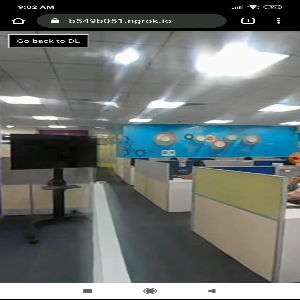

In [0]:
# Write Python3 code here 
import os 
import cv2 
import numpy as np 
import tensorflow as tf 
import sys
from google.colab.patches import cv2_imshow 
  
# This is needed since the notebook is stored in the object_detection folder. 
sys.path.append("..") 
  
# Import utilites 
from utils import label_map_util 
from utils import visualization_utils as vis_util 
  
# Name of the directory containing the object detection module we're using 
MODEL_NAME = 'inference_graph' # The path to the directory where frozen_inference_graph is stored. 
IMAGE_NAME = '11man.jpg'  # The path to the image in which the object has to be detected. 
  
# Grab path to current working directory 
CWD_PATH = os.getcwd() 
  
# Path to frozen detection graph .pb file, which contains the model that is used 
# for object detection. 
PATH_TO_CKPT =  "/content/drive/My Drive/ssd/models/research/object_detection/3_pp_neg/13000/frozen_inference_graph.pb";

#PATH_TO_CKPT = "/content/drive/My Drive/ssd/models/research/ssdlite_mobilenet_v2_coco_2018_05_09/frozen_inference_graph.pb" 
# Path to label map file 
PATH_TO_LABELS = "/content/drive/My Drive/ssd/models/research/object_detection/ppiteration2/pixelperfect.pbtxt" 
#PATH_TO_LABELS = "/content/drive/My Drive/ssd/models/research/ssdlite_mobilenet_v2_coco_2018_05_09/ssd.pbtxt"

# Path to image 
PATH_TO_IMAGE = "/content/drive/My Drive/ssd/models/research/object_detection/ppiteration2/test_images/true5.jpg"
  
# Number of classes the object detector can identify 
NUM_CLASSES = 1
  
# Load the label map. 
# Label maps map indices to category names, so that when our convolution 
# network predicts `5`, we know that this corresponds to `king`. 
# Here we use internal utility functions, but anything that returns a 
# dictionary mapping integers to appropriate string labels would be fine 
label_map = label_map_util.load_labelmap(PATH_TO_LABELS) 
categories = label_map_util.convert_label_map_to_categories( 
        label_map, max_num_classes = NUM_CLASSES, use_display_name = True) 
category_index = label_map_util.create_category_index(categories) 
  
# Load the Tensorflow model into memory. 
detection_graph = tf.Graph() 
with detection_graph.as_default(): 
    od_graph_def = tf.GraphDef() 
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid: 
        serialized_graph = fid.read() 
        od_graph_def.ParseFromString(serialized_graph) 
        tf.import_graph_def(od_graph_def, name ='') 
  
    sess = tf.Session(graph = detection_graph) 
  
# Define input and output tensors (i.e. data) for the object detection classifier 
  
# Input tensor is the image 
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0') 
  
# Output tensors are the detection boxes, scores, and classes 
# Each box represents a part of the image where a particular object was detected 
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0') 
  
# Each score represents level of confidence for each of the objects. 
# The score is shown on the result image, together with the class label. 
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0') 
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0') 
  
# Number of objects detected 
num_detections = detection_graph.get_tensor_by_name('num_detections:0') 
  
# Load image using OpenCV and 
# expand image dimensions to have shape: [1, None, None, 3] 
# i.e. a single-column array, where each item in the column has the pixel RGB value 
image = cv2.imread(PATH_TO_IMAGE)
image = cv2.resize(image, (300, 300)) 
image_expanded = np.expand_dims(image, axis = 0) 
  
# Perform the actual detection by running the model with the image as input 
(boxes, scores, classes, num) = sess.run( 
    [detection_boxes, detection_scores, detection_classes, num_detections], 
    feed_dict ={image_tensor: image_expanded}) 
  
# Draw the results of the detection (aka 'visualize the results')

print(num);
print(scores);
  
vis_util.visualize_boxes_and_labels_on_image_array( 
    image, 
    np.squeeze(boxes), 
    np.squeeze(classes).astype(np.int32), 
    np.squeeze(scores), 
    category_index, 
    use_normalized_coordinates = True, 
    line_thickness = 8, 
    min_score_thresh = 0.7) 
  
# All the results have been drawn on the image. Now display the image. 
cv2_imshow(image) 
  
# Press any key to close the image 
cv2.waitKey(0) 
  
# Clean up 
cv2.destroyAllWindows()